## Visualising Experiment Duration for conducting AB tests

In [340]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Loading CSV data  - User Traffic for each variation of experiment 

In [367]:
# Reading the weekly traffic data for every country/page combination 
data = pd.read_csv('/Users/shriyagupta/Downloads/country_page_traffic (1).csv') 
data.head()

,"country_code,page,acq_weekly_traffic"
0,"BD,Checkout,28735.0"
1,"JP,PayPal Home,155307.0"
2,"GR,Checkout,8047.0"
3,"ZA,Checkout,19228.0"
4,"GT,Checkout,4440.0"


In [368]:
data[['country_code','page','acq_weekly_traffic']] = data['country_code,page,acq_weekly_traffic'].str.split(',', expand=True,)
data.drop('country_code,page,acq_weekly_traffic',axis = 1,inplace=True)
data['page'] = data['page'].replace('PayPal Home', 'Home')
data.head()

,country_code,page,acq_weekly_traffic
0,BD,Checkout,28735.0
1,JP,Home,155307.0
2,GR,Checkout,8047.0
3,ZA,Checkout,19228.0
4,GT,Checkout,4440.0


### Detecting missing country code values for 2 rows 

In [369]:
pd.set_option('display.max_rows', None)
data['country_code'].value_counts()   # insights - country code missing for 2 rows 

US    3
LV    3
LA    3
SV    3
RS    3
IN    3
SK    3
AM    3
JP    2
MX    2
MM    2
PE    2
CR    2
EE    2
CH    2
SN    2
NG    2
AR    2
GT    2
CM    2
NO    2
PA    2
OM    2
SI    2
MO    2
CN    2
HK    2
YE    2
DO    2
BS    2
GH    2
RO    2
BG    2
UG    2
UY    2
LK    2
AU    2
DZ    2
VE    2
BH    2
MZ    2
CZ    2
LY    2
KZ    2
GB    2
LB    2
PT    2
UZ    2
KR    2
QA    2
NL    2
NZ    2
LU    2
TZ    2
PH    2
EC    2
CI    2
IL    2
CO    2
MA    2
BY    2
IQ    2
GP    2
MU    2
KH    2
DK    2
ID    2
AE    2
MY    2
ZM    2
MW    2
DE    2
MD    2
LT    2
JO    2
ES    2
SO    2
PY    2
PS    2
CY    2
TH    2
BA    2
CL    2
MK    2
SE    2
NP    2
IE    2
GE    2
EG    2
VN    2
BE    2
BR    2
UA    2
HN    2
BJ    2
SA    2
HR    2
PR    2
MG    2
IT    2
ZA    2
MT    2
TW    2
AL    2
RE    2
      2
BW    2
CD    2
HU    2
FI    2
KW    2
BD    2
AZ    2
TT    2
KE    2
SG    2
MQ    2
TR    2
ZW    2
TN    2
HT    2
AO    2
JM    2
CA    2
GR    2


In [370]:
len(data)

291

### Loading ISO Country codes 

In [371]:
# Loading country codes 
country_codes = pd.read_csv('/Users/shriyagupta/Downloads/all.csv')
country_codes = country_codes[['name','alpha-2','alpha-3']]
country_codes.head()


,name,alpha-2,alpha-3
0,Afghanistan,AF,AFG
1,Åland Islands,AX,ALA
2,Albania,AL,ALB
3,Algeria,DZ,DZA
4,American Samoa,AS,ASM


In [372]:
df = pd.merge(data,country_codes,left_on='country_code', right_on='alpha-2')
print(len(df))

289


### Creating new dataframe with country codes 

In [373]:
df.head()

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3
0,BD,Checkout,28735.0,Bangladesh,BD,BGD
1,BD,Customer Merchant Home,503.0,Bangladesh,BD,BGD
2,JP,Home,155307.0,Japan,JP,JPN
3,JP,Checkout,119067.0,Japan,JP,JPN
4,GR,Checkout,8047.0,Greece,GR,GRC


In [374]:
len(df)

289

In [375]:
df.dtypes

country_code          object
page                  object
acq_weekly_traffic    object
name                  object
alpha-2               object
alpha-3               object
dtype: object

In [376]:
df['acq_weekly_traffic'] = pd.to_numeric(df['acq_weekly_traffic'])

### Making data consistent - checking and correcting for misspellings 

In [377]:
df['page'].value_counts() # insight Checkout misspelled as Checkoutn

Home                      150
Checkout                  133
Customer Merchant Home      3
Checkoutn                   3
Name: page, dtype: int64

In [378]:
df['page'] = df['page'].replace('Checkoutn','Checkout')

### Handling Duplicates in Data 

In [379]:
df[df['page']== 'PayPal Home']['country_code'].value_counts().head() # insight-> duplicates in home page

Series([], Name: country_code, dtype: int64)

In [380]:
df[df['page']== 'Checkout']['country_code'].value_counts().head() # insight-> dusplicates in home page

AM    3
LV    2
SK    2
SV    2
MM    1
Name: country_code, dtype: int64

In [381]:
# Duplicate country codes 
df[df['country_code'].isin(['RS','LA','AM','LV','SV','SK'])]

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3
10,SK,Home,11524.0,Slovakia,SK,SVK
11,SK,Checkout,3052.0,Slovakia,SK,SVK
12,SK,Checkout,3052.0,Slovakia,SK,SVK
247,AM,Checkout,2884.0,Armenia,AM,ARM
248,AM,Checkout,683.0,Armenia,AM,ARM
249,AM,Checkout,683.0,Armenia,AM,ARM
261,RS,Checkout,5883.0,Serbia,RS,SRB
262,RS,Home,10792.0,Serbia,RS,SRB
263,RS,Home,10792.0,Serbia,RS,SRB
264,LA,Home,1067.0,Lao People's Democratic Republic,LA,LAO


In [382]:
df = df.drop_duplicates()
len(df)

283

In [383]:
df.drop(df.index[[246]], inplace=True)          # (Getting rid of Armenia/Checkout outlier value) 
df[df['country_code'].isin(['RS','LA','AM','LV','SV','SK'])]

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3
10,SK,Home,11524.0,Slovakia,SK,SVK
11,SK,Checkout,3052.0,Slovakia,SK,SVK
248,AM,Checkout,683.0,Armenia,AM,ARM
261,RS,Checkout,5883.0,Serbia,RS,SRB
262,RS,Home,10792.0,Serbia,RS,SRB
264,LA,Home,1067.0,Lao People's Democratic Republic,LA,LAO
266,LA,Checkout,750.0,Lao People's Democratic Republic,LA,LAO
276,SV,Home,5811.0,El Salvador,SV,SLV
277,SV,Checkout,2999.0,El Salvador,SV,SLV
283,LV,Home,5809.0,Latvia,LV,LVA


In [573]:
df

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3,conversion_rate,sample_size,expected_experiment_duration
0,BD,Checkout,28735.0,Bangladesh,BD,BGD,10,354139,12.324308
1,BD,Customer Merchant Home,503.0,Bangladesh,BD,BGD,6,616553,1225.751491
2,JP,Home,155307.0,Japan,JP,JPN,8,452544,2.913867
3,JP,Checkout,119067.0,Japan,JP,JPN,8,452544,3.800751
4,GR,Checkout,8047.0,Greece,GR,GRC,9,397875,49.443892
5,GR,Home,26005.0,Greece,GR,GRC,10,354139,13.618112
6,ZA,Checkout,19228.0,South Africa,ZA,ZAF,6,616553,32.065373
7,ZA,Home,30214.0,South Africa,ZA,ZAF,7,522834,17.304362
8,GT,Checkout,4440.0,Guatemala,GT,GTM,8,452544,101.924324
9,GT,Home,7629.0,Guatemala,GT,GTM,5,747760,98.015467


### Adding Column for conversion rate (random assignment between 1%-10%)

In [385]:
random.seed(9001) # Setting seed for same random initialiozation 
df['conversion_rate'] = np.random.randint(1,11, size=len(df))

In [386]:
df.head()

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3,conversion_rate
0,BD,Checkout,28735.0,Bangladesh,BD,BGD,10
1,BD,Customer Merchant Home,503.0,Bangladesh,BD,BGD,6
2,JP,Home,155307.0,Japan,JP,JPN,8
3,JP,Checkout,119067.0,Japan,JP,JPN,8
4,GR,Checkout,8047.0,Greece,GR,GRC,9


### Sample size for conversion rates (between 1 to 10) having relative Minimum Detectable Effect = 2%, Statistical Power=80% and Significance level = 5% 

In [387]:
sample_size = {1:3896727, 2:1928622, 3:1272588, 4:944570, 5:747760, 6:616553, 7:522834, 8:452544, 9:397875, 10:354139}

In [388]:
df['sample_size'] = [sample_size[df['conversion_rate'].iloc[i]] for i in range(0,len(df))]

In [389]:
df['expected_experiment_duration'] = (df['sample_size']/df['acq_weekly_traffic']) 

### Plotting distribution of expected experiment duration (in weeks)

Text(0.5,1,'Distribution of Expected Time to run experiment')

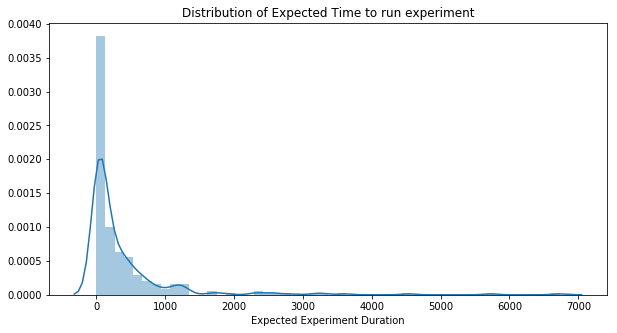

In [574]:
plt.figure(figsize = (10,5))
sns.distplot(df['expected_experiment_duration']);
plt.xlabel('Expected Experiment Duration')
plt.title('Distribution of Expected Time to run experiment')

In [559]:
top10 = df.sort_values(by='expected_experiment_duration', ascending=True).head(10)

In [560]:
top10

,country_code,page,acq_weekly_traffic,name,alpha-2,alpha-3,conversion_rate,sample_size,expected_experiment_duration
132,US,Home,2751899.0,United States of America,US,USA,4,944570,0.343243
133,US,Checkout,685802.0,United States of America,US,USA,8,452544,0.659876
176,CN,Checkout,918610.0,China,CN,CHN,5,747760,0.814012
88,IN,Home,367661.0,India,IN,IND,7,522834,1.422055
251,DE,Home,881492.0,Germany,DE,DEU,3,1272588,1.443675
123,IT,Home,229100.0,Italy,IT,ITA,10,354139,1.545784
177,CN,Home,287383.0,China,CN,CHN,8,452544,1.574707
90,MX,Home,206909.0,Mexico,MX,MEX,10,354139,1.711569
254,GB,Home,553994.0,United Kingdom of Great Britain and Northern I...,GB,GBR,3,1272588,2.297115
124,RU,Home,164288.0,Russian Federation,RU,RUS,9,397875,2.421814


In [561]:
x_h = list(top10['country_code'])
x_h2 = list(top10['page'])
x_h3 = [x_h[i]+" | "+x_h2[i] for i in range(0, len(x_h))]
y_v = list(top10['expected_experiment_duration'])
y_v = [ round(elem, 2) for elem in y_v ]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)


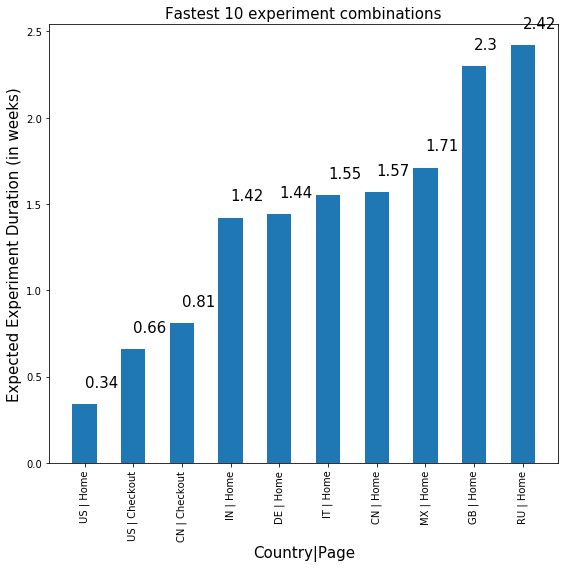

In [562]:
fig, ax = plt.subplots(figsize = (8,8))
ax.bar(x_h3,y_v,width=0.5)
for index,data in enumerate(y_v):
    plt.text(x=index , y =data+0.1, s=f"{data}" , fontdict=dict(fontsize=15))
    
print(plt.xticks(rotation=90))
plt.xlabel('Country|Page',fontsize='15')
plt.ylabel('Expected Experiment Duration (in weeks)',fontsize='15')
plt.title('Fastest 10 experiment combinations',fontsize='15')
plt.tight_layout()
plt.show()

### Fastest 10 combinations by page 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)


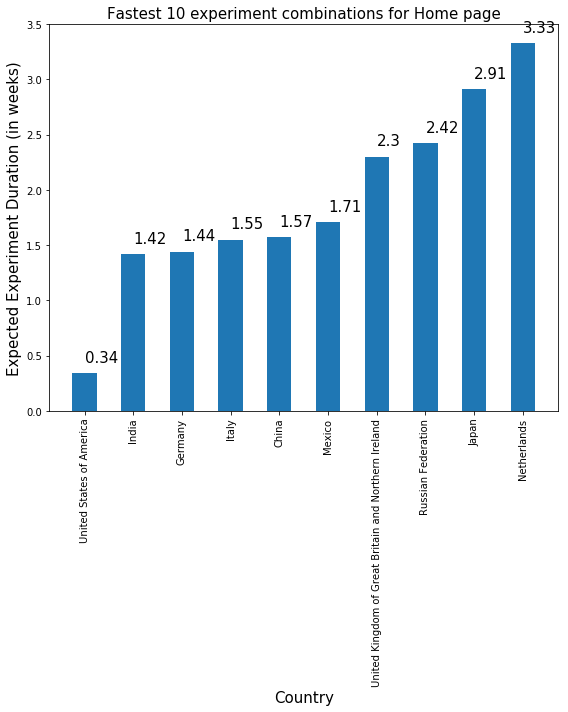

In [563]:
df_home = df[df['page']== 'Home']
top10 = df_home.sort_values(by='expected_experiment_duration', ascending=True).head(10)
x_h = list(top10['name'])
y_v = list(top10['expected_experiment_duration'])
y_v = [ round(elem, 2) for elem in y_v ]

fig, ax = plt.subplots(figsize = (8,10))
ax.bar(x_h,y_v,width=0.5)
for index,data in enumerate(y_v):
    plt.text(x=index , y =data+0.1, s=f"{data}" , fontdict=dict(fontsize=15))

print(plt.xticks(rotation=90))
plt.xlabel('Country', fontsize='15')
plt.ylabel('Expected Experiment Duration (in weeks)', fontsize='15')
plt.title('Fastest 10 experiment combinations for Home page', fontsize='15')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)


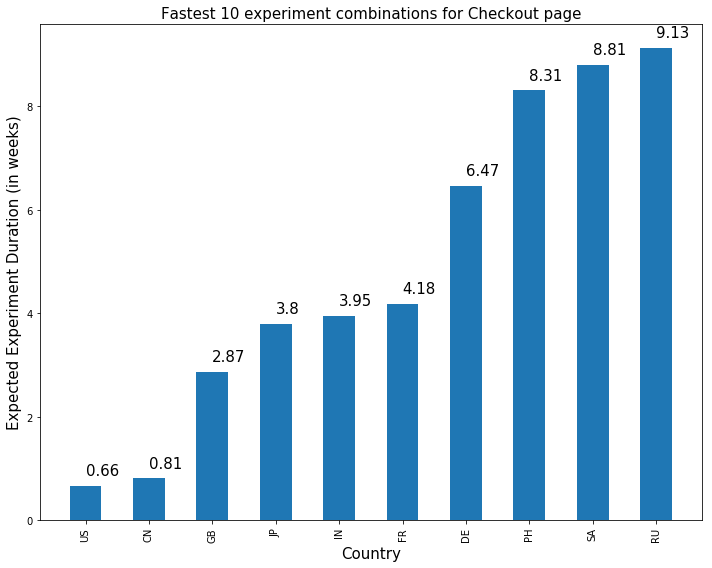

In [564]:
df_checkout = df[df['page']== 'Checkout']
top10 = df_checkout.sort_values(by='expected_experiment_duration', ascending=True).head(10)
x_h = list(top10['country_code'])
y_v = list(top10['expected_experiment_duration'])
y_v = [ round(elem, 2) for elem in y_v ]

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(x_h,y_v,width=0.5)
for index,data in enumerate(y_v):
    plt.text(x=index , y =data+0.2 , s=f"{data}" , fontdict=dict(fontsize=15))

print(plt.xticks(rotation=90))
plt.xlabel('Country', fontsize='15')
plt.ylabel('Expected Experiment Duration (in weeks)', fontsize='15')
plt.title('Fastest 10 experiment combinations for Checkout page', fontsize='15')

plt.tight_layout()
plt.show()

([0, 1, 2], <a list of 3 Text xticklabel objects>)


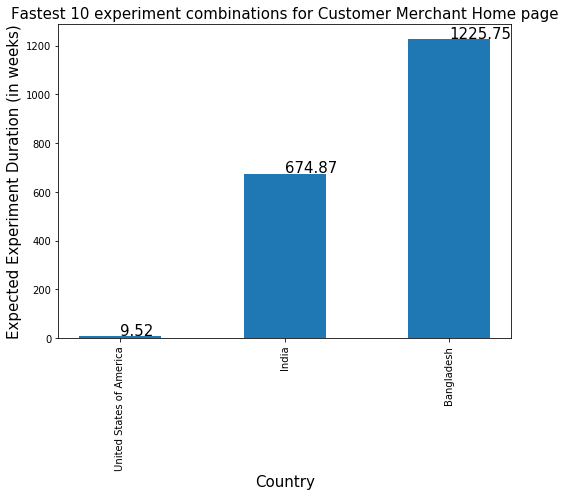

In [565]:
df_merchant = df[df['page']== 'Customer Merchant Home']
top10 = df_merchant.sort_values(by='expected_experiment_duration', ascending=True).head(10)
x_h = list(top10['name'])
y_v = list(top10['expected_experiment_duration'])
y_v = [ round(elem, 2) for elem in y_v ]

fig, ax = plt.subplots(figsize = (8,7))
ax.bar(x_h,y_v,width=0.5)
for index,data in enumerate(y_v):
    plt.text(x=index , y =data+4 , s=f"{data}" , fontdict=dict(fontsize=15))
    
print(plt.xticks(rotation=90))
plt.xlabel('Country', fontsize='15')
plt.ylabel('Expected Experiment Duration (in weeks)', fontsize='15')
plt.title('Fastest 10 experiment combinations for Customer Merchant Home page', fontsize='15')

plt.tight_layout()
plt.show()